<a href="https://colab.research.google.com/github/muthamlikitha/Elitetech-intern/blob/main/Task1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1:
MACHINE LEARNING MODEL
 IMPLEMENTATION
 CREATE A PREDICTIVE MODEL USING SCIKIT
LEARN TO CLASSIFY OR PREDICT OUTCOMES
 FROM A DATASET (E.G., SPAM EMAIL
 DETECTION).
 DELIVERABLE:
A
JUPYTER
NOTEBOOK
 SHOWCASING THE MODEL’S IMPLEMENTATION
 AND EVALUATION

Missing values:
 label        0
message      0
label_num    0
dtype: int64


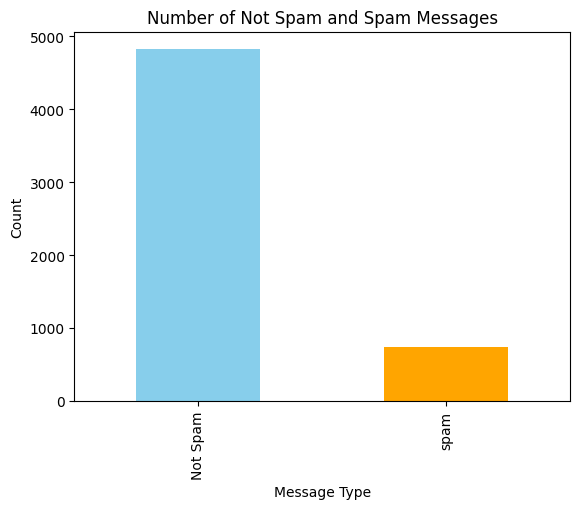

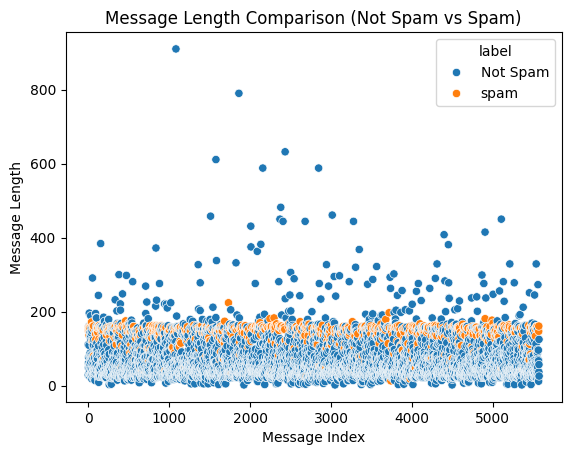


✅ Model Accuracy: 0.9766816143497757

📋 Detailed Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.97      1.00      0.99       965
        Spam       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



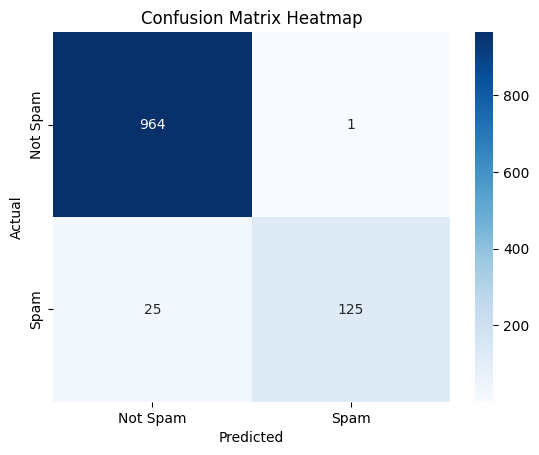


🔍 Predictions for New Messages:

Congratulations! You have won a $1000 Amazon gift card. Claim now! --> Spam
Hey, what time is the class tomorrow? --> Not Spam
Urgent: Your bank account will be blocked. Verify immediately! --> Not Spam


In [ ]:
# Step 1: Import all the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the dataset
data = pd.read_csv("/content/spam.csv", encoding='latin-1')

# The dataset has extra columns, we only need 'v1' (label) and 'v2' (message)
data = data[['v1', 'v2']]
data.columns = ['label', 'message']   # rename columns

data['label'] = data['label'].replace({'ham': 'Not Spam'})

# Step 3: Convert labels into numbers (Not Spam = 0, Spam = 1)
data['label_num'] = data['label'].map({'Not Spam': 0, 'spam': 1})

# Step 4: Check if there are missing values
print("Missing values:\n", data.isnull().sum())

# Step 5: Visualize message counts
data['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Number of Not Spam and Spam Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

# Step 6: Scatter plot for message length
data['length'] = data['message'].apply(len)
sns.scatterplot(x=range(len(data)), y=data['length'], hue=data['label'])
plt.title("Message Length Comparison (Not Spam vs Spam)")
plt.xlabel("Message Index")
plt.ylabel("Message Length")
plt.show()

# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label_num'], test_size=0.2, random_state=42
)

# Step 8: Convert text into numeric form using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 9: Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vec, y_train)

# Step 10: Test the model
y_pred = model.predict(X_test_vec)

# Step 11: Show accuracy and performance
print("\n✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Detailed Classification Report:\n", classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam']))

# Step 12: Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 13: Try new messages
examples = [
    "Congratulations! You have won a $1000 Amazon gift card. Claim now!",
    "Hey, what time is the class tomorrow?",
    "Urgent: Your bank account will be blocked. Verify immediately!"
]

print("\n🔍 Predictions for New Messages:\n")
for msg in examples:
    result = model.predict(vectorizer.transform([msg]))[0]
    label = "Spam" if result == 1 else "Not Spam"
    print(f"{msg} --> {label}")
